In [13]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv('GOLD_2000.csv', index_col = 0, skiprows=0)
df=df.reset_index()
print(df.shape)
df.head(10)

(462, 8)


,Date,Price,Open,High,Low,Vol.,Change %,Date_m
0,01-Jun-16,1211.9,1215.7,1219.8,1205.4,2.72K,-0.24,42522
1,02-Jun-16,1209.8,1212.4,1217.0,1209.6,1.63K,-0.17,42523
2,03-Jun-16,1240.1,1209.1,1244.5,1206.4,1.62K,2.50,42524
3,06-Jun-16,1244.6,1244.4,1247.3,1240.0,1.14K,0.36,42527
4,07-Jun-16,1244.4,1244.0,1244.9,1236.5,0.28K,-0.02,42528
5,08-Jun-16,1259.8,1247.6,1264.0,1247.3,0.41K,1.24,42529
6,09-Jun-16,1270.2,1262.5,1271.4,1258.1,0.38K,0.83,42530
7,10-Jun-16,1273.4,1267.6,1278.0,1265.3,0.40K,0.25,42531
8,13-Jun-16,1284.4,1276.2,1287.3,1273.0,0.33K,0.86,42534
9,14-Jun-16,1285.6,1281.8,1289.7,1277.8,0.55K,0.09,42535


In [15]:
df=df.drop("Date",axis=1,inplace=False);
df=df.drop("Vol.",axis=1,inplace=False);
df=df.drop("Change %",axis=1,inplace=False);
df=df.drop("Low",axis=1,inplace=False);
df=df.drop("High",axis=1,inplace=False);
df=df.drop("Open",axis=1,inplace=False);
y =  df["Price"]
X = df.drop(["Price"],axis=1,inplace=False)
df.head(10)

,Price,Date_m
0,1211.9,42522
1,1209.8,42523
2,1240.1,42524
3,1244.6,42527
4,1244.4,42528
5,1259.8,42529
6,1270.2,42530
7,1273.4,42531
8,1284.4,42534
9,1285.6,42535


In [12]:
import numpy as np
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print("train set shape: %s, %s" %(X_train.shape[0],y_train.shape[0]) )
print("test set shape: %s, %s" %(X_test.shape[0],y_train.shape[0]) )
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = reg.predict(X_test)  # predict the demand for X_test
mse = mean_squared_error(y_test, y_pred)  # Real vs predicted demand for X_test
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("pred set shape: %s" %(y_pred.shape[0]) )
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))



train set shape: 3392, 3392
test set shape: 1454, 3392
pred set shape: 1454
mse = 45047.76313916335, rmse = 212.24458329757994 
mae = 166.5674887611502 r2 = 0.8007142455347507


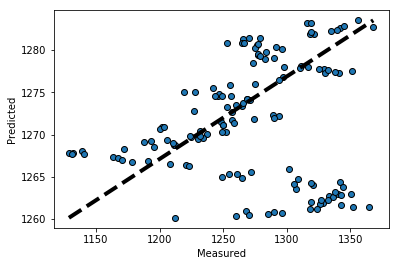

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [37]:
df = pd.read_csv('Dates2predict.csv', index_col = 0, skiprows=0)
df=df.reset_index()
df.head(10)

,Date_m
0,43109
1,43110
2,43111
3,43112
4,43113
5,43114
6,43115
7,43116
8,43117
9,43118


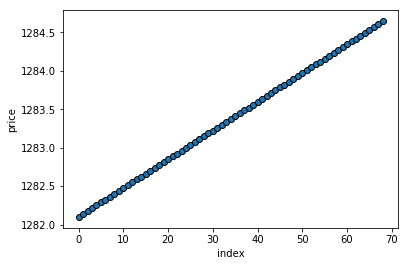

In [38]:
X_test = df
y_pred = reg.predict(X_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test.index,y_pred, edgecolors=(0, 0, 0))
ax.set_xlabel('index')
ax.set_ylabel('price')
plt.show()


In [39]:

import numpy as np
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=123)


print("train set shape: %s, %s" %(X_train.shape[0],y_train.shape[0]) )
print("test set shape: %s, %s" %(X_test.shape[0],y_train.shape[0]) )
from sklearn import linear_model
reg = linear_model.Lasso()
reg.fit(X_train, y_train)

train set shape: 462, 462
test set shape: 0, 462


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

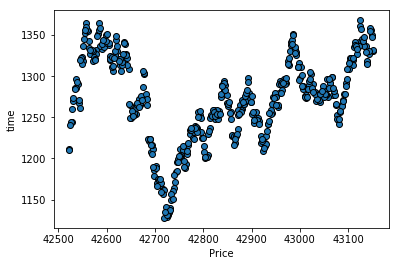

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_train,y_train, edgecolors=(0, 0, 0))
ax.set_xlabel('Price')
ax.set_ylabel('time')
plt.show()


In [41]:
df = pd.read_csv('Dates2predict.csv', index_col = 0, skiprows=0)
df=df.reset_index()
X_test = df

X_test.head(10)


,Date_m
0,43109
1,43110
2,43111
3,43112
4,43113
5,43114
6,43115
7,43116
8,43117
9,43118


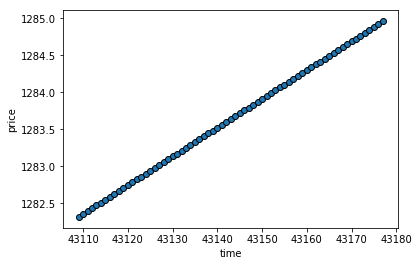

In [42]:
y_pred = reg.predict(X_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test,y_pred, edgecolors=(0, 0, 0))
ax.set_xlabel('time')
ax.set_ylabel('price')
plt.show()

prediction = pd.DataFrame(X_test,y_pred).to_csv('prediction_GOLD.csv')
